In [1]:
import pandas as pd
import os
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()

'/home/piai/문서/빅데이터프로젝트'

In [2]:
df = pd.read_csv("./df.csv", encoding = 'euc-kr')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
df.columns

Index(['의뢰ID', '상품목표주문금액', '상품순주문금액', '상품목표공헌이익금액', '상품예상취급금액', '매출액', '순매출액',
       '소요분', '가중분', '방송구분', '프로그램명', 'ARS금액', '방송시작시간', '방송종료시간', 'PD', 'SH',
       'TD', 'MD담당자명', '부서코드', '부서명', '협력사ID', '협력사명', '브랜드ID', '브랜드명', '대분류',
       '중분류', '카테고리', '요일', '요일그룹', '분기', '주', '월', '시간', '시간대', '연도', '계절',
       '목표달성율', '목표달성여부'],
      dtype='object')

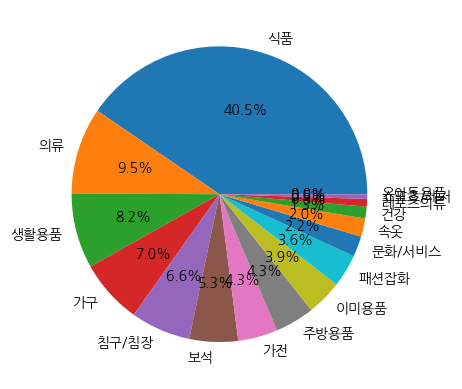

['식품', '의류', '생활용품', '가구', '침구/침장', '보석', '가전', '주방용품', '이미용품', '패션잡화', '문화/서비스', '속옷', '건강', '레포츠의류', '스포츠/레저', '유아동용품']


In [6]:
import matplotlib.pyplot as plt
category_count = df['대분류'].value_counts() #각각 품목별 개수를 세기
plt.pie(category_count, labels=category_count.index, autopct='%0.1f%%') #파이차트 그리기
plt.show()

sorted_category_count = category_count.sort_values(ascending=False) 
print(sorted_category_count.index.tolist())


# 대분류는 식품, 의류, 생활용품 순으로 많다
# => 우리 주력상품은 식품, 의류, 생활용품

계절
겨울    57083210100
봄     38755431300
여름    32776442300
가을    31698919700
Name: 매출액, dtype: int64


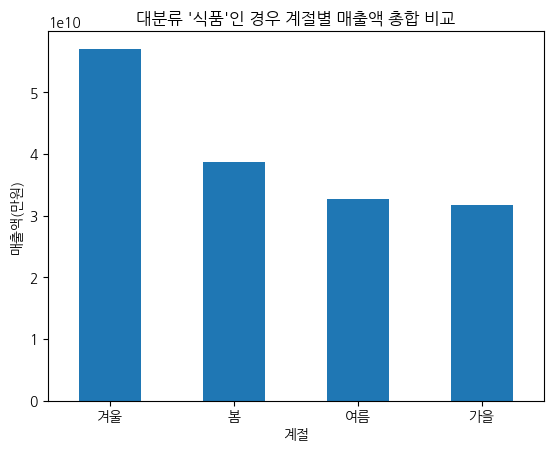

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# '성공여부' 열 '성공'이고 '대분류'가 '식품'인 경우 필터링
df_filtered = df[(df['대분류'] == '의류')]

# '계절' 별 '매출액' 총합 구하기
df_season_sum = df_filtered.groupby('계절')['매출액'].sum()

# 총합이 큰 순서대로 정렬
df_season_sum = df_season_sum.sort_values(ascending=False)

# 결과 출력
print(df_season_sum)

# 그래프 그리기
df_season_sum.plot(kind='bar', rot=0)

# 그래프 제목 설정
plt.title("대분류 '식품'인 경우 계절별 매출액 총합 비교")

# 그래프 축 레이블 설정
plt.xlabel("계절")
plt.ylabel("매출액(만원)")

# 그래프 출력
plt.show()


In [28]:
import pandas as pd
from scipy import stats

# '성공여부'가 '성공'이고 '대분류'가 '의류'이며 '계절'이 '봄'에 해당하는 데이터 필터링
df_filtered_spring = df[(df['대분류'] == '의류') & (df['계절'] == '봄')]

# '매출액' 열만 추출하여 새로운 데이터프레임 생성
df_spring = pd.DataFrame(df_filtered_spring['매출액'])

# '성공여부'가 '성공'이고 '대분류'가 '의류'이며 '계절'이 '봄'에 해당하는 데이터 필터링
df_filtered_summer = df[(df['대분류'] == '의류') & (df['계절'] == '여름')]

# '매출액' 열만 추출하여 새로운 데이터프레임 생성
df_summer = pd.DataFrame(df_filtered_summer['매출액'])

# '성공여부'가 '성공'이고 '대분류'가 '의류'이며 '계절'이 '봄'에 해당하는 데이터 필터링
df_filtered_autumn = df[(df['대분류'] == '의류') & (df['계절'] == '가을')]

# '매출액' 열만 추출하여 새로운 데이터프레임 생성
df_autumn = pd.DataFrame(df_filtered_autumn['매출액'])

# '성공여부'가 '성공'이고 '대분류'가 '의류'이며 '계절'이 '봄'에 해당하는 데이터 필터링
df_filtered_winter = df[(df['대분류'] == '의류') & (df['계절'] == '겨울')]

# '매출액' 열만 추출하여 새로운 데이터프레임 생성
df_winter = pd.DataFrame(df_filtered_winter['매출액'])
                                                                      


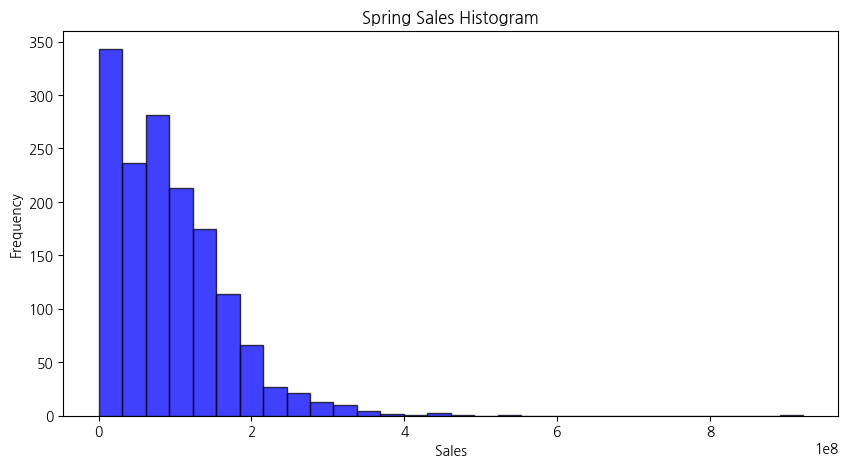

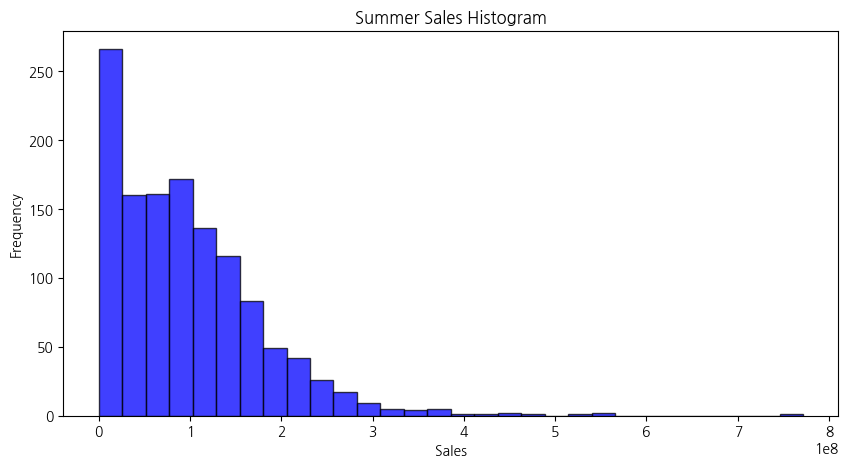

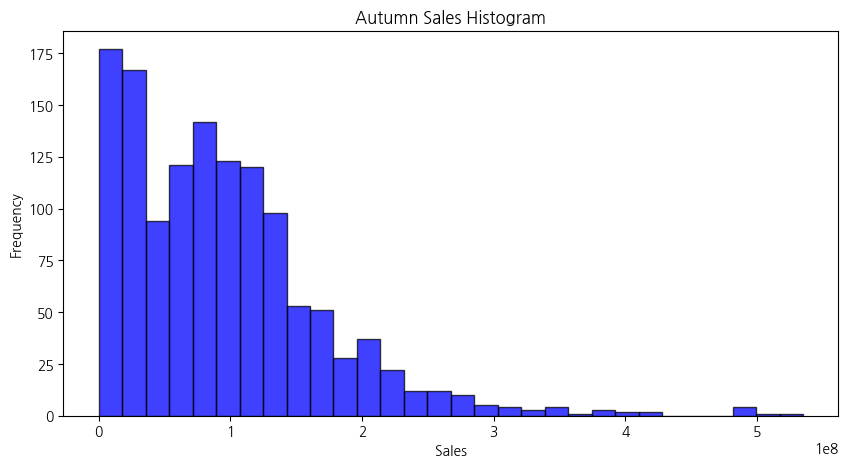

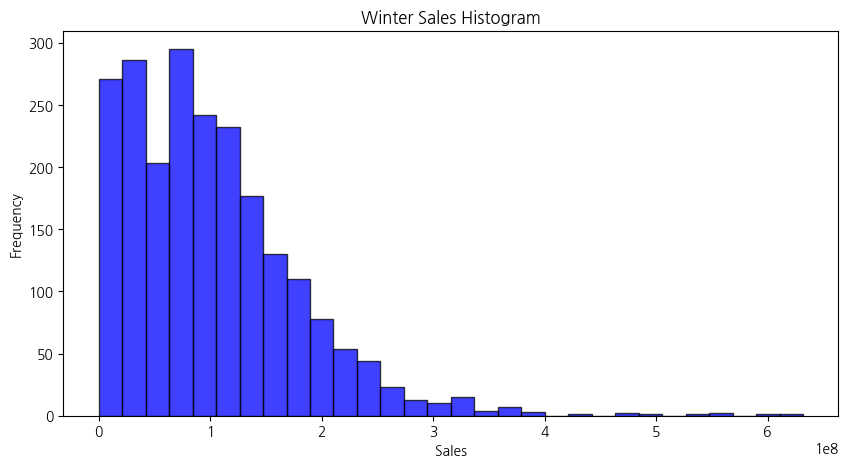

In [22]:
import matplotlib.pyplot as plt

# 히스토그램을 그리는 함수 정의
def plot_histogram(data, title, xlabel, ylabel):
    plt.figure(figsize=(10,5)) 
    plt.hist(data, bins=30, alpha=0.75, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 봄 데이터의 매출액에 대한 히스토그램 생성
plot_histogram(df_spring['매출액'], 'Spring Sales Histogram', 'Sales', 'Frequency')

# 여름 데이터의 매출액에 대한 히스토그램 생성
plot_histogram(df_summer['매출액'], 'Summer Sales Histogram', 'Sales', 'Frequency')

# 가을 데이터의 매출액에 대한 히스토그램 생성
plot_histogram(df_autumn['매출액'], 'Autumn Sales Histogram', 'Sales', 'Frequency')

# 겨울 데이터의 매출액에 대한 히스토그램 생성
plot_histogram(df_winter['매출액'], 'Winter Sales Histogram', 'Sales', 'Frequency')


In [32]:
from scipy.stats import kruskal

# '대분류'가 '의류'인 데이터 필터링
df_filtered = df[df['대분류'] == '의류']

# 계절별 매출액 데이터 리스트로 추출
seasons = sorted(list(set(df_filtered['계절'])))
data = [df_filtered[df_filtered['계절'] == season]['매출액'] for season in seasons]

# Kruskal-Wallis 검정 실행
statistic, p_value = kruskal(*data)

# 결과 출력
print("Kruskal-Wallis 검정 결과:")
print("통계량 (H):", statistic)
print("p-value:", p_value)


if result.pvalue < 0.05:
    print("각 계절별 매출액에 통계적으로 유의미한 차이가 존재합니다.")
else:
    print("각 계절별 매출액에 통계적으로 유의미한 차이가 존재하지 않습니다.")


Kruskal-Wallis 검정 결과:
통계량 (H): 4.079010953695479
p-value: 0.2530577981261492
각 계절별 매출액에 통계적으로 유의미한 차이가 존재하지 않습니다.


# 성공, 대분류:식품, 계절:여름인 경우 요일별 매출액 총합 차이

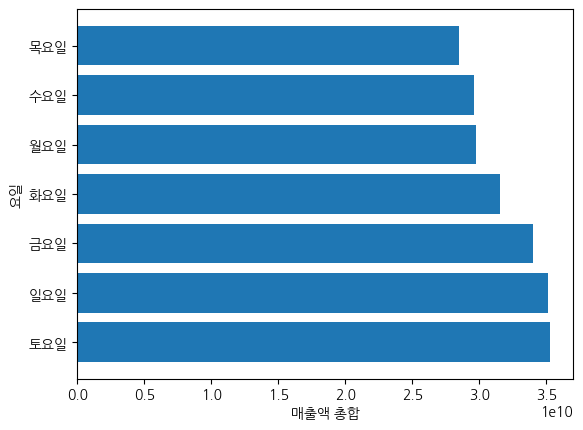

[35238703460, 35144572100, 33971911700, 31505922400, 29713059900, 29559907400, 28456303900]


In [41]:
import matplotlib.pyplot as plt

# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름'인 데이터 필터링
df_filtered = df[((df['대분류'] == '식품') & (df['계절'] == '겨울'))]

# 각 요일별 매출액 총합 계산
df_day_sum = df_filtered.groupby('요일')['매출액'].sum()

# 매출액 총합이 큰 순으로 정렬하여 그래프 출력
plt.barh(df_day_sum.sort_values(ascending=False).index, df_day_sum.sort_values(ascending=False).values)
plt.xlabel('매출액 총합')
plt.ylabel('요일')
plt.show()

# 매출액 총합이 큰 순으로 정렬하여 리스트 출력
print(df_day_sum.sort_values(ascending=False).tolist())
# '성공여부'가 '성공'이고 '대분류'가 '식품'이며 '계절'이 '봄'에 해당하는 데이터 필터링
df_filtered_summer = df[((df['대분류'] == '식품') & (df['계절'] == '겨울'))]

# '매출액' 열만 추출하여 새로운 데이터프레임 생성
df_summer = pd.DataFrame(df_filtered_summer['매출액'])

In [34]:
from scipy.stats import kruskal

# '대분류'가 '의류'이고 '계절'이 '겨울'인 데이터 필터링
df_filtered = df[(df['대분류'] == '의류')]

# '요일'별 '매출액' 데이터 리스트로 추출
days = sorted(list(set(df_filtered['요일'])))
data = [df_filtered[df_filtered['요일'] == day]['매출액'] for day in days]

# Kruskal-Wallis 검정 실행
statistic, p_value = kruskal(*data)

# 결과 출력
print("Kruskal-Wallis 검정 결과:")
print("통계량 (H):", statistic)
print("p-value:", p_value)

print(result.pvalue)
# 결과 출력
if result.pvalue < 0.05:
    print("각 계절별 매출액에 통계적으로 유의미한 차이가 존재합니다.")
else:
    print("각 계절별 매출액에 통계적으로 유의미한 차이가 존재하지 않습니다.")


Kruskal-Wallis 검정 결과:
통계량 (H): 2.5603523800779078
p-value: 0.8616530690957516
0.2530577981261492
각 계절별 매출액에 통계적으로 유의미한 차이가 존재하지 않습니다.


# 성공, 대분류:식품, 계절:여름, 요일:목요일 일 때 시간대별 차이

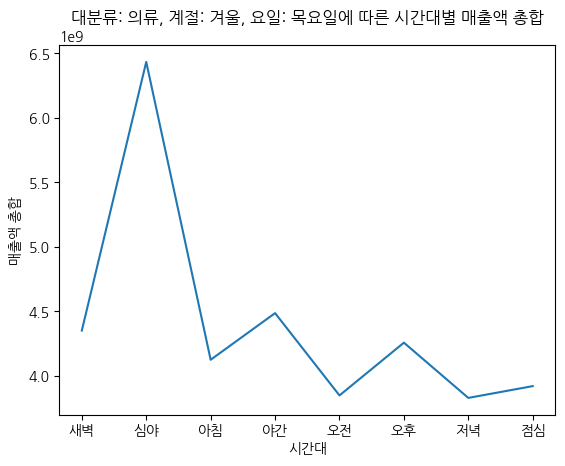

In [43]:
import matplotlib.pyplot as plt

# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일'에 해당하는 데이터 필터링
df_filtered = df[((df['대분류'] == '식품') & (df['계절'] == '겨울') & (df['요일'] == '토요일'))]

# '시간대'별 매출액 총합 계산
df_sum = df_filtered.groupby('시간대')['매출액'].sum()

# 선 그래프 그리기
plt.plot(df_sum.index, df_sum.values)
plt.title('대분류: 의류, 계절: 겨울, 요일: 목요일에 따른 시간대별 매출액 총합')
plt.xlabel('시간대')
plt.ylabel('매출액 총합')
plt.show()


In [27]:
from scipy.stats import f_oneway

# '대분류'가 '의류', '계절'이 '겨울', '요일'이 '토요일'인 데이터 필터링
df_filtered = df[(df['대분류'] == '의류') & (df['계절'] == '겨울') & (df['요일'] == '토요일')]

# '시간대'별 '매출액' 데이터 리스트로 추출
time_periods = sorted(list(set(df_filtered['시간대'])))
data = [df_filtered[df_filtered['시간대'] == time]['매출액'] for time in time_periods]

# 일원분산분석 실행
statistic, p_value = f_oneway(*data)

# 결과 출력
print("One-Way ANOVA 결과:")
print("통계량 (F):", statistic)
print("p-value:", p_value)


One-Way ANOVA 결과:
통계량 (F): 2.220622468135927
p-value: 0.044556775613256994


### 이것도 검정을 해야하는지 그냥 우리가 임의로 뽑아도 되는지 모르겠어

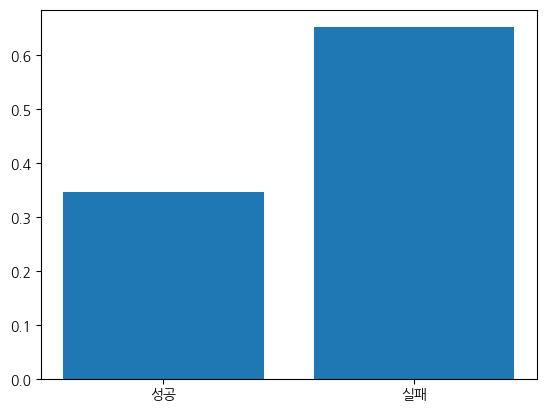

0.34782608695652173

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 조건에 맞는 행들 추출하기

filtered_df = df[((df['계절'] == '겨울') & (df['대분류'] == '의류') & (df['시간대'] == '아침'))]


# 추출한 행들 중에서 '성공여부'열 값이 '성공'인 것의 비율 계부하기
success_rate = filtered_df[filtered_df['목표달성여부'] == 1].shape[0] / filtered_df.shape[0]

# 그래프 그리기
plt.bar(['성공', '실패'], [success_rate, 1-success_rate])
plt.show()


success_rate

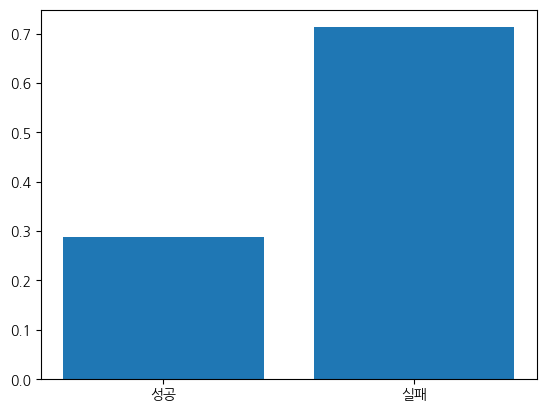

0.2871105681124007

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 조건에 맞는 행들 추출하기

filtered_df = df[(df['대분류'] == '의류')]


# 추출한 행들 중에서 '성공여부'열 값이 '성공'인 것의 비율 계부하기
success_rate = filtered_df[filtered_df['목표달성여부'] == 1].shape[0] / filtered_df.shape[0]

# 그래프 그리기
plt.bar(['성공', '실패'], [success_rate, 1-success_rate])
plt.show()


success_rate

# 성공, 대분류:식품, 계절:여름, 요일:목요일 일 때 시간대: 오전일 때 쇼호스트 몇 번 나오는지

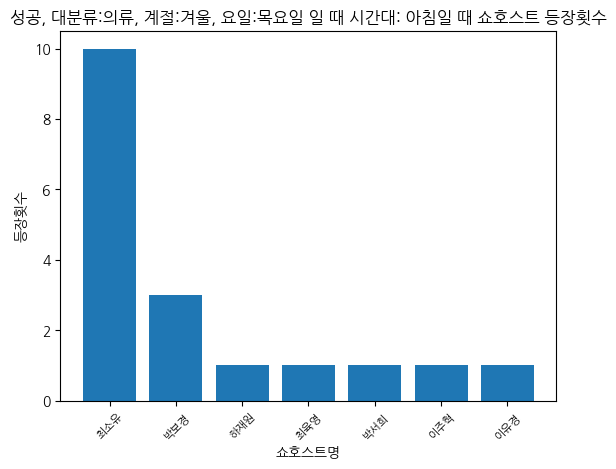

In [64]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일', '시간대'가 '오전'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '의류') & (df['계절'] == '겨울') & (df['요일'] == '목요일') & (df['시간대'] == '아침')]

# 'SH' 등장 횟수 추출
freq_dict = {}

for idx, row in df_filtered.iterrows():
    names = row['SH'].split(',')
    for name in names:
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

# 등장 횟수가 큰 순서대로 정렬
sorted_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# 그래프 생성 
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title("성공, 대분류:의류, 계절:겨울, 요일:목요일 일 때 시간대: 아침일 때 쇼호스트 등장횟수")
plt.xlabel("쇼호스트명")
plt.ylabel("등장횟수")

# x축 라벨 회전 및 fontsize 조정
plt.xticks(rotation=45, fontsize=8)

plt.show()


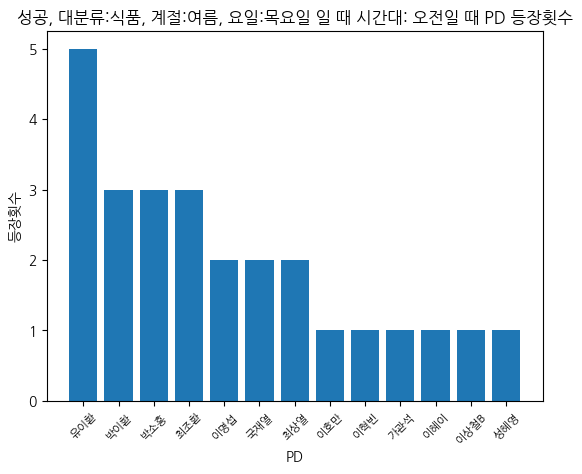

In [66]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일', '시간대'가 '오전'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '식품') & (df['계절'] == '여름') & (df['요일'] == '목요일') & (df['시간대'] == '오전')]


# 'SH' 등장 횟수 추출
freq_dict = {}

for idx, row in df_filtered.iterrows():
    names = row['PD'].split(',')
    for name in names:
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

# 등장 횟수가 큰 순서대로 정렬
sorted_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# 그래프 생성 
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title("성공, 대분류:식품, 계절:여름, 요일:목요일 일 때 시간대: 오전일 때 PD 등장횟수")
plt.xlabel("PD")
plt.ylabel("등장횟수")

# x축 라벨 회전 및 fontsize 조정
plt.xticks(rotation=45, fontsize=8)

plt.show()


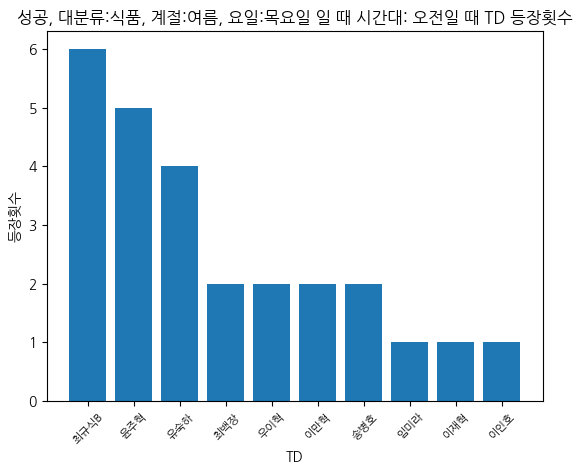

In [46]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일', '시간대'가 '오전'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '식품') & (df['계절'] == '여름') & (df['요일'] == '목요일') & (df['시간대'] == '오전')]

# 'SH' 등장 횟수 추출
freq_dict = {}

for idx, row in df_filtered.iterrows():
    names = row['TD'].split(',')
    for name in names:
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

# 등장 횟수가 큰 순서대로 정렬
sorted_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# 그래프 생성 
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title("성공, 대분류:식품, 계절:여름, 요일:목요일 일 때 시간대: 오전일 때 TD 등장횟수")
plt.xlabel("TD")
plt.ylabel("등장횟수")

# x축 라벨 회전 및 fontsize 조정
plt.xticks(rotation=45, fontsize=8)

plt.show()


In [55]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 이름을 Transaction 형태로 변환
transactions = []

for idx, row in df.iterrows():
    names = set()
    for col in ['SH', 'PD', 'TD']:
        for name in str(row[col]).split(','):
            names.add(name)

    names.add(row['목표달성여부'])
    transactions.append(names)

# TransactionEncoder를 이용하여 원-핫 인코딩 수행
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# apriori를 이용하여 빈발 항목 집합을 계산
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# 연관 규칙 분석 수행
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
association_rules_df.sort_values(by='confidence', ascending=False, inplace=True)

print(association_rules_df)

    antecedents consequents  antecedent support  consequent support   support  \
197  (하재원, 박서희)        (성공)            0.011381            0.621921  0.010446   
115       (최소유)        (성공)            0.047591            0.621921  0.039250   
123       (하재원)        (성공)            0.039874            0.621921  0.032507   
90        (이이규)        (성공)            0.018358            0.621921  0.014577   
13        (강주우)        (성공)            0.025101            0.621921  0.019567   
..          ...         ...                 ...                 ...       ...   
178       (박상언)   (박보경, 성공)            0.090154            0.041940  0.010173   
188       (박상언)  (박승희, 안수연)            0.090154            0.013213  0.010095   
43        (박상언)       (이주혁)            0.090154            0.052385  0.010095   
35        (송병호)       (박상언)            0.094871            0.090154  0.010173   
169       (윤주혁)       (이유경)            0.137473            0.093428  0.014461   

     confidence      lift  